In [ ]:
! conda install openmm openff-toolkit ambertools 

In [93]:
from openff.toolkit.topology import Molecule

propane = Molecule.from_smiles("CCC")
propane.generate_conformers(n_conformers=1)

propane.to_file("propane.pdb", file_format="pdb")

In [94]:
from openmm.app import AmberPrmtopFile, AmberInpcrdFile
from openmm import Platform
from openmm.app import NoCutoff

prmtop = AmberPrmtopFile("propane.prmtop")
inpcrd = AmberInpcrdFile("propane.inpcrd")

system = prmtop.createSystem(nonbondedMethod=NoCutoff)
positions = inpcrd.getPositions()
print(positions)

[Vec3(x=1.217, y=-0.243, z=0.211), Vec3(x=0.039, y=0.664, z=-0.065), Vec3(x=-1.211, y=-0.19, z=-0.205), Vec3(x=0.848, y=-1.277, z=0.454), Vec3(x=1.896, y=-0.345, z=-0.643), Vec3(x=1.701, y=0.101, z=1.145), Vec3(x=-0.147, y=1.388, z=0.763), Vec3(x=0.245, y=1.247, z=-0.979), Vec3(x=-1.576, y=-0.247, z=-1.238), Vec3(x=-0.983, y=-1.243, z=0.09), Vec3(x=-2.029, y=0.145, z=0.466)] A


In [95]:
for i, force in enumerate(system.getForces()):
    print(f"Force {i}: {force.__class__.__name__}")

Force 0: HarmonicBondForce
Force 1: HarmonicAngleForce
Force 2: PeriodicTorsionForce
Force 3: NonbondedForce
Force 4: CMMotionRemover


In [96]:
torsion_force = [f for f in system.getForces() if f.__class__.__name__ == "PeriodicTorsionForce"][0]

print(f"Number of torsions: {torsion_force.getNumTorsions()}")
input_data=[]
for i in range(torsion_force.getNumTorsions()):
    a1, a2, a3, a4, periodicity, phase, k = torsion_force.getTorsionParameters(i)
    input_data.append([a1, a2, a3, a4, periodicity, phase, k])
    print(f"Torsion {i}: atoms {a1}-{a2}-{a3}-{a4}, periodicity={periodicity}, phase={phase}, k={k/4.18}")
input_arr=np.array(input_data)
for row in input_arr:
    row[5] = row[5].value_in_unit(radian) 
    row[6] = row[6].value_in_unit(kilojoule_per_mole)
input_arr

Number of torsions: 18
Torsion 0: atoms 0-1-2-8, periodicity=3, phase=0.0 rad, k=0.1601531100478469 kJ/mol
Torsion 1: atoms 0-1-2-9, periodicity=3, phase=0.0 rad, k=0.1601531100478469 kJ/mol
Torsion 2: atoms 0-1-2-10, periodicity=3, phase=0.0 rad, k=0.1601531100478469 kJ/mol
Torsion 3: atoms 3-0-1-2, periodicity=3, phase=0.0 rad, k=0.1601531100478469 kJ/mol
Torsion 4: atoms 4-0-1-2, periodicity=3, phase=0.0 rad, k=0.1601531100478469 kJ/mol
Torsion 5: atoms 5-0-1-2, periodicity=3, phase=0.0 rad, k=0.1601531100478469 kJ/mol
Torsion 6: atoms 3-0-1-6, periodicity=3, phase=0.0 rad, k=0.1501435406698565 kJ/mol
Torsion 7: atoms 3-0-1-7, periodicity=3, phase=0.0 rad, k=0.1501435406698565 kJ/mol
Torsion 8: atoms 4-0-1-6, periodicity=3, phase=0.0 rad, k=0.1501435406698565 kJ/mol
Torsion 9: atoms 4-0-1-7, periodicity=3, phase=0.0 rad, k=0.1501435406698565 kJ/mol
Torsion 10: atoms 5-0-1-6, periodicity=3, phase=0.0 rad, k=0.1501435406698565 kJ/mol
Torsion 11: atoms 5-0-1-7, periodicity=3, phase=0.0

array([[0, 1, 2, 8, 3, 0.0, 0.66944],
       [0, 1, 2, 9, 3, 0.0, 0.66944],
       [0, 1, 2, 10, 3, 0.0, 0.66944],
       [3, 0, 1, 2, 3, 0.0, 0.66944],
       [4, 0, 1, 2, 3, 0.0, 0.66944],
       [5, 0, 1, 2, 3, 0.0, 0.66944],
       [3, 0, 1, 6, 3, 0.0, 0.6276],
       [3, 0, 1, 7, 3, 0.0, 0.6276],
       [4, 0, 1, 6, 3, 0.0, 0.6276],
       [4, 0, 1, 7, 3, 0.0, 0.6276],
       [5, 0, 1, 6, 3, 0.0, 0.6276],
       [5, 0, 1, 7, 3, 0.0, 0.6276],
       [6, 1, 2, 8, 3, 0.0, 0.6276],
       [6, 1, 2, 9, 3, 0.0, 0.6276],
       [6, 1, 2, 10, 3, 0.0, 0.6276],
       [7, 1, 2, 8, 3, 0.0, 0.6276],
       [7, 1, 2, 9, 3, 0.0, 0.6276],
       [7, 1, 2, 10, 3, 0.0, 0.6276]], dtype=object)

In [97]:
dic={"[Dihedrals]":input_arr}
import matplotlib.pyplot as plt


def plot_U_dihedral(dic,printhere=False): #entryline,
    U_dihedral=np.zeros(361)
    
    plt.figure()
    for i in range(len(dic["[Dihedrals]"])):
        if (dic["[Dihedrals]"][i][1] == 0 and  dic["[Dihedrals]"][i][2] == 1) or (dic["[Dihedrals]"][i][1] == 1 and  dic["[Dihedrals]"][i][2] == 0) :
           # atoms=dic["[Dihedrals]"][i][0]
           # print(atoms)
           # div=int(dic["[Dihedrals]"][i][5])
            barrier_term=float(dic["[Dihedrals]"][i][6])/4.18 #kJ to kcal
            phase=float(dic["[Dihedrals]"][i][5]) #phase /deg
            periodicity=int(float(dic["[Dihedrals]"][i][4]))
            print(f"{dic['[Dihedrals]'][i][0]}-{dic['[Dihedrals]'][i][1]}-{dic['[Dihedrals]'][i][2]}-{dic['[Dihedrals]'][i][3]} : {barrier_term} ")
            phi=np.linspace(-180,180,361) # in deg
            U_dihedral = U_dihedral + (barrier_term * (1+np.cos(np.deg2rad(periodicity*phi)-phase)))
            plt.plot(phi,(U_dihedral-np.min(U_dihedral)),'--r')#label=f"{atoms} - {i}")
        else:
            continue


    
    plt.plot(phi,(U_dihedral-np.min(U_dihedral)))
    #plt.plot(phi,coulomb_all,'--r')
   # plt.title("$U_{dihedral}(φ) = barrierterm/div \cdot[1+cos(nφ-δ)]$\nwith $barrierterm$=%.3f kJ mol$^{-1}$;div=%i $n=%.3f$; $δ$=%.4f deg"%(barrier_term,div,periodicity,phase))
    #plt.xlabel("$φ_{%s}$ / deg"%atoms)
    plt.ylabel("$U_{dihedral}$ / kcal mol$^{-1}$")
    print((max(U_dihedral)-min(U_dihedral)))
    plt.xlim([-180,180])
    #plt.ylim([0,8])
    #plt.legend()
    plt.savefig("U_dihedral.png", dpi=300)
    if printhere==False:
        plt.close()
    
    return

3-0-1-2 : 0.1601531100478469 
4-0-1-2 : 0.1601531100478469 
5-0-1-2 : 0.1601531100478469 
3-0-1-6 : 0.15014354066985647 
3-0-1-7 : 0.15014354066985647 
4-0-1-6 : 0.15014354066985647 
4-0-1-7 : 0.15014354066985647 
5-0-1-6 : 0.15014354066985647 
5-0-1-7 : 0.15014354066985647 
2.7626411483253586


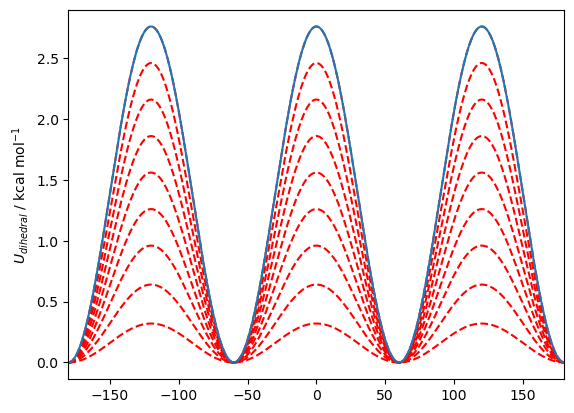

In [98]:
plot_U_dihedral(dic,printhere=True)